# PROBLEM STATEMENT: CAUSES OF DEATH IN THE UNITED STATES

THIS IS MY FIRST DATA ANALYSIS PROJECT WHEREIN I TRY TO INVESTIGATE THE DIFFERENT CAUSES OF DEATH IN THE UNITED STATES. I AM INDEBTED TO DR.OSSAMA EMBARAK AND HIS BOOK,'DATA ANALYSIS AND VISUALIZATION USING PYTHON' FOR GETTING ME STARTED WITH THIS PROJECT.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv("NCHS.csv")
data.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [3]:
data.shape

(10868, 6)

In [4]:
#drop all rows with NaN values
data=data.dropna()
data.shape

(10868, 6)

In [5]:
#show all possible causes of death
causes=data["Cause Name"].unique()
print(causes)
len(causes)

['Unintentional injuries' 'All causes' "Alzheimer's disease" 'Stroke'
 'CLRD' 'Diabetes' 'Heart disease' 'Influenza and pneumonia' 'Suicide'
 'Cancer' 'Kidney disease']


11

In [6]:
#remove 'All causes' from causes
data=data[data["Cause Name"]!="All causes"]
causes=data["Cause Name"].unique()
print(causes)
len(causes)

['Unintentional injuries' "Alzheimer's disease" 'Stroke' 'CLRD' 'Diabetes'
 'Heart disease' 'Influenza and pneumonia' 'Suicide' 'Cancer'
 'Kidney disease']


10

In [7]:
state=data['State'].unique()
state

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [8]:
data=data[data['State']!='United States']
state=data['State'].unique()
state

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [9]:
len(state)

51

In [10]:
#calculate total number of deaths in the period 1999-2017
data['Deaths'].sum()

36280583

In [13]:
#Calculating number of deaths registered per year in the period 1999-2017
dyear=data.groupby('Year').sum()
dyear

,Deaths,Age-adjusted Death Rate
Year,,
1999,1905826,35592.3
2000,1902194,35161.3
2001,1899358,34580.3
2002,1918873,34429.2
2003,1912115,33846.1
2004,1864133,32397.1
2005,1889981,32318.8
2006,1854676,31152.8
2007,1846301,30456.4


Text(0, 0.5, 'Number of Deaths')

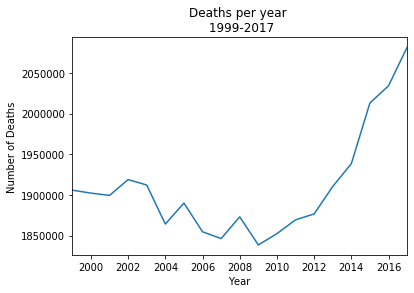

In [14]:
#plot number of deaths registered in the period 1999-2017
dyear['Deaths'].plot(title="Deaths per year \n 1999-2017")
plt.ylabel('Number of Deaths')

In [15]:
dstate=data.groupby('State').sum()
dstate=dstate.drop(['Year','Age-adjusted Death Rate'],axis=1)
dstate

,Deaths
State,
Alabama,689468
Alaska,50101
Arizona,676578
Arkansas,431902
California,3594261
Colorado,440074
Connecticut,418389
Delaware,109842
District of Columbia,69786


In [16]:
dstate.sort_values("Deaths",ascending=False,inplace=True)
dstate.head(10)

,Deaths
State,
California,3594261
Florida,2533472
Texas,2367695
New York,2264120
Pennsylvania,1854953
Ohio,1605250
Illinois,1508039
Michigan,1313813
North Carolina,1115953


Text(0, 0.5, 'Number of Deaths')

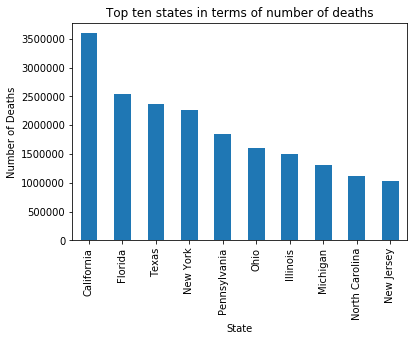

In [17]:
#Top 10 States in terms of number of deaths
dstate['Deaths'].head(10).plot.bar(title="Top ten states in terms of number of deaths")
plt.ylabel('Number of Deaths')

In [18]:
dcauses=data.groupby('Cause Name').sum()
dcauses=dcauses.drop(['Year','Age-adjusted Death Rate'],axis=1)
dcauses

,Deaths
Cause Name,
Alzheimer's disease,1494816
CLRD,2594927
Cancer,10843644
Diabetes,1399943
Heart disease,12222640
Influenza and pneumonia,1094641
Kidney disease,858613
Stroke,2726523
Suicide,697016


In [19]:
dcauses.sort_values("Deaths",ascending=False,inplace=True)
dcauses

,Deaths
Cause Name,
Heart disease,12222640
Cancer,10843644
Stroke,2726523
CLRD,2594927
Unintentional injuries,2347820
Alzheimer's disease,1494816
Diabetes,1399943
Influenza and pneumonia,1094641
Kidney disease,858613


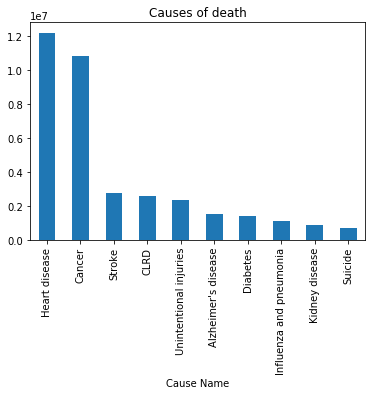

In [21]:
#Top 10 causes of deaths in the United States
dcauses['Deaths'].plot.bar(title="Causes of death")

In [22]:
dcause=data.groupby('Cause Name')
dsuicide=dcause.get_group('Suicide')
#number of suicides yearwise in the period 1999-2017
dsuicide=dsuicide.groupby('Year').sum()
dsuicide

,Deaths,Age-adjusted Death Rate
Year,,
1999,29199,599.9
2000,29350,597.1
2001,30622,618.5
2002,31655,629.3
2003,31484,623.0
2004,32439,631.0
2005,32637,627.7
2006,33300,632.9
2007,34598,645.6


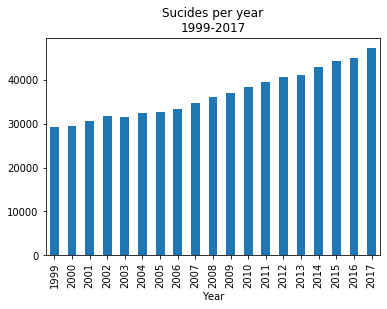

In [23]:
dsuicide['Deaths'].plot.bar(title="Sucides per year\n1999-2017")

In [24]:
#number of deaths due to cancer in the period 1999-2017
dcancer=dcause.get_group('Cancer')
dcancer=dcancer.groupby('Year').sum()
dcancer

,Deaths,Age-adjusted Death Rate
Year,,
1999,549838,10274.6
2000,553091,10209.6
2001,553768,10085.6
2002,557271,9945.5
2003,556902,9791.2
2004,553888,9571.7
2005,559312,9495.9
2006,559888,9334.4
2007,562875,9229.7


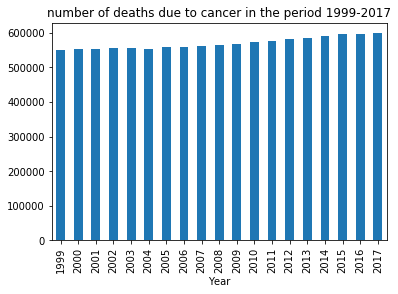

In [25]:
dcancer['Deaths'].plot.bar(title="number of deaths due to cancer in the period 1999-2017")

Finding number 1:
Total number of deaths=36280583
--------------------------------------------------------------------------------------------------
Finding number 2:
Number of causes investigated=10
--------------------------------------------------------------------------------------------------
Finding number 3:
Number of deaths incresed sharply after 2009
--------------------------------------------------------------------------------------------------
Finding number 4:
California recorded maximum deaths,distantly followed by Florida
--------------------------------------------------------------------------------------------------
Finding number 5:
Heart diseases are the major causes of death,followed by cancer
---------------------------------------------------------------------------------------------------